In [1]:
import swyft
import numpy as np
from swyft.utils.simulator import Simulator
from dask.distributed import LocalCluster

In [2]:
z = swyft.Prior({"a": ['uniform', 1., 1.], "b": ['uniform', -1., 1.]})

In [3]:
def model(params):
        """ 
        Linear model
        """
        p = np.linspace(-1, 1, 10)
        mu = params['a'] + p*params['b']
        return dict(x=mu)

In [4]:
def noise(obs, sigma=100):
        mu = obs['x']
        n = np.random.randn(*mu.shape)*sigma
        x = mu + n
        return dict(x=x)

In [5]:
simulator = Simulator(model, noise)

In [6]:
cluster = LocalCluster()
simulator.set_dask_cluster(cluster)
x = simulator.run(z, 10000)

In [7]:
print(x)

[{'x': array([-129.14722346,  312.39531978,  269.98133883,  -39.579799  ,
        -13.6501842 ,   16.29023233,   65.61735661,   35.13166714,
         50.78493312,   24.5962203 ])}, {'x': array([-172.9599659 , -181.49957387, -104.54955746,  -44.24697824,
         32.28138876,   75.79997998,  -97.89191591,    0.2999508 ,
        170.40533838,   90.90869985])}, {'x': array([   2.14972644,  -37.63526235, -128.38375815,  220.45435855,
         40.25083798,   54.72662252,   63.93337691, -140.46392416,
         83.61183427,   96.16149147])}, {'x': array([  59.57097531,   30.27275668,    0.78912515,  -80.84653087,
         40.19478741, -109.15840794,    5.96123853,   13.69993806,
       -213.07382523,  -88.76132148])}, {'x': array([-106.43487918,   23.83966974,   -7.26750898,    0.3802674 ,
         18.6761532 ,   34.2973874 ,   -6.64763378,   -1.0346706 ,
         53.31562087,    5.00588155])}, {'x': array([ 161.69455042,  -24.33355368,  -84.69655574,  -22.86967488,
         38.44470227, -161

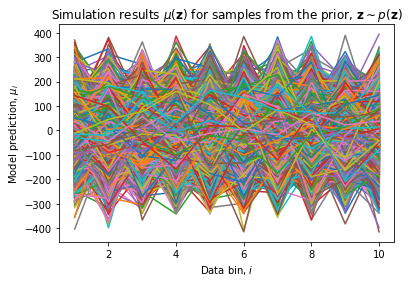

In [10]:
import pylab as plt
for line in x:
    plt.plot(range(1, 11), line['x']);
plt.xlabel("Data bin, $i$");
plt.ylabel("Model prediction, $\mu_i$");
plt.title("Simulation results ${\mu}(\mathbf{z})$ for samples from the prior, $\mathbf{z}\sim p(\mathbf{z})$");